In [134]:
#required Libraries
import numpy as np
import matplotlib.pyplot as plt

**GENERATE 5-CLASS SYNTHETIC DATASET**



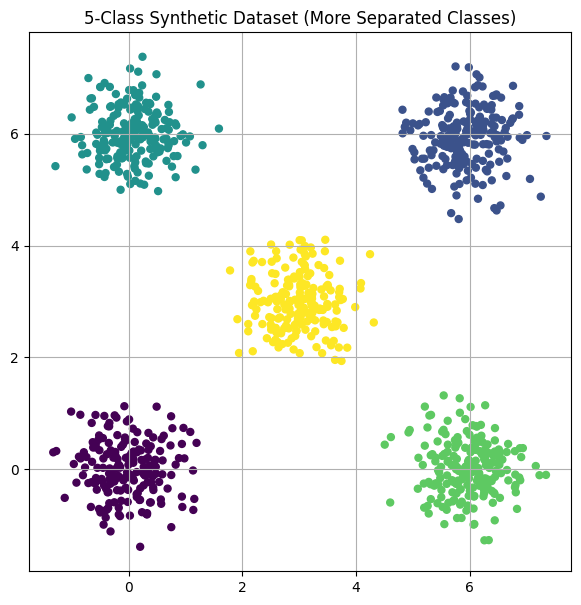

In [135]:
np.random.seed(0)

def generate_dataset(n_samples=1000):
    X = []
    Y = []

    # 5 cluster centers for 5 classes
    centers = [
        [0, 0],     # Class 0
        [6, 6],     # Class 1
        [0, 6],     # Class 2
        [6, 0],     # Class 3
        [3, 3]      # Class 4
    ]

    for i, c in enumerate(centers):
        x = np.random.randn(n_samples//5, 2) * 0.5 + c
        y = np.full((n_samples//5,), i)
        X.append(x)
        Y.append(y)

    return np.vstack(X), np.hstack(Y)


# Generate dataset
X, Y = generate_dataset(1000)

# Plot
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=25)
plt.title("5-Class Synthetic Dataset (More Separated Classes)")
plt.grid(True)
plt.show()


**Split the generated dataset into training and testing sets.**

In [136]:
# One-hot encoding converting class values in combination of 0,1 for softmax
def one_hot(y, num_classes=5):
    oh = np.zeros((y.size, num_classes))
    oh[np.arange(y.size), y] = 1
    return oh


# Train-Test Split int 5 fold
def train_test_split_manual(X, Y, test_ratio=0.2):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    split = int(len(idx) * (1 - test_ratio))

    train_idx = idx[:split]
    test_idx  = idx[split:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]


Y_oh = one_hot(Y)
X_train, X_test, y_train, y_test = train_test_split_manual(X, Y_oh)


**Code Modification:**

**Network Architecture Modifications**

1.   Added a third hidden layer model capacity for learning complex patterns.
2.   Output layer changed to 5 neurons (outLayerNeurons) for 5-class classification.
3.   Hidden layer sizes increased (64 → 32 → 16) .
4.   Used 2 Activation function ReLU(backpropogation) and Softmax(for multiclassification)

Formula:
ReLU(x)=max(0,x)

Formula:softmax
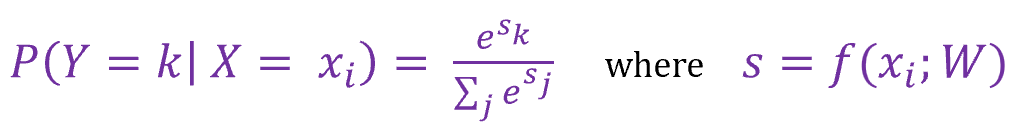



**Challenges and Solutions (Simplified):**

Initially: Used sigmoid for all layers (forward and backprop). Training was slow and performance was poor.

**Fix:** Replaced hidden layer activations with ReLU → faster training and better results.

Initially: Output layer used sigmoid → not suitable for multi-class classification.

**Fix: **Replaced with softmax in forward pass and used cross-entropy for backprop → correct class probabilities.

In [141]:

class NeuralNetwork:
    def __init__(self):
        # Architecture
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 64
        hiddenLayer2Neurons = 32
        hiddenLayer3Neurons = 16
        outLayerNeurons = 5

        self.learning_rate = 0.01

        #intial weights
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons) * np.sqrt(1 / inputLayerNeurons)
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons) * np.sqrt(1 / hiddenLayer1Neurons)
        self.W_H3H2 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons) * np.sqrt(1 / hiddenLayer2Neurons)
        self.W_OH3  = np.random.randn(hiddenLayer3Neurons, outLayerNeurons) * np.sqrt(1 / hiddenLayer3Neurons)

    # ---------------- Activation Functions ----------------
    def relu(self, x, der=False):
        if der:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    def softmax(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

    # Feedforward
    def feedForward(self, X):
            self.hidden1_input = X.dot(self.W_H1I)
            self.hidden1_output = self.relu(self.hidden1_input)

            self.hidden2_input = self.hidden1_output.dot(self.W_H2H1)
            self.hidden2_output = self.relu(self.hidden2_input)

            self.hidden3_input = self.hidden2_output.dot(self.W_H3H2)
            self.hidden3_output = self.relu(self.hidden3_input)

            self.output_input = self.hidden3_output.dot(self.W_OH3)
            self.pred = self.softmax(self.output_input)

            return self.pred

    # Backpropagation
    def backPropagation(self, X, Y,pred):
            m = Y.shape[0]

            # Output layer delta (Softmax + Cross-Entropy simplifies gradient)
            output_delta = (pred - Y) / m

            # Hidden layer 3
            hidden3_error = output_delta.dot(self.W_OH3.T)
            hidden3_delta = hidden3_error * self.relu(self.hidden3_output, der=True)

            # Hidden layer 2
            hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
            hidden2_delta = hidden2_error * self.relu(self.hidden2_output, der=True)

            # Hidden layer 1
            hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
            hidden1_delta = hidden1_error * self.relu(self.hidden1_output, der=True)

            # Update weights
            self.W_H1I -= self.learning_rate * X.T.dot(hidden1_delta)
            self.W_H2H1 -= self.learning_rate * self.hidden1_output.T.dot(hidden2_delta)
            self.W_H3H2 -= self.learning_rate * self.hidden2_output.T.dot(hidden3_delta)
            self.W_OH3 -= self.learning_rate * self.hidden3_output.T.dot(output_delta)


    def train(self,X,Y):
      output=self.feedForward(X)
      self.backPropagation(X,Y,output)

    def predict(self, X):
      pred = self.feedForward(X)
      return np.argmax(pred, axis=1)


**Training and Testing:**
training,plot loss cruve and print loss for every 1000 epoch

Epoch 0 | Loss = 0.1378
Epoch 1000 | Loss = 0.0468
Epoch 2000 | Loss = 0.0432
Epoch 3000 | Loss = 0.0422
Epoch 4000 | Loss = 0.0417
Epoch 5000 | Loss = 0.0414
Epoch 6000 | Loss = 0.0412
Epoch 7000 | Loss = 0.0411
Epoch 8000 | Loss = 0.0410
Epoch 9000 | Loss = 0.0410


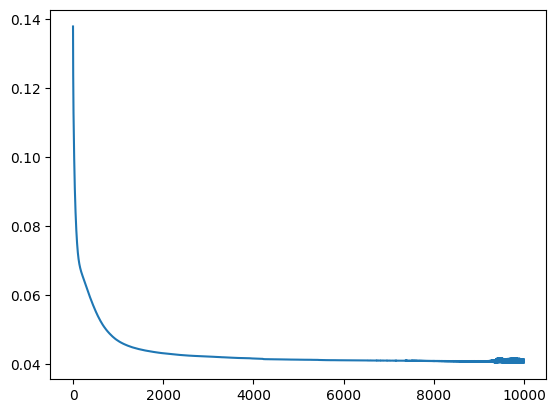

In [142]:
NN=NeuralNetwork()

err=[]

for i in range(10000):
  NN.train(X,Y_oh)
  err.append(np.mean(np.square(Y_oh-NN.feedForward(X))))
  if i%1000==0:
    print(f"Epoch {i} | Loss = {err[-1]:.4f}")

plt.plot(err)

In [143]:
print(X)

[[ 0.88202617  0.2000786 ]
 [ 0.48936899  1.1204466 ]
 [ 0.933779   -0.48863894]
 ...
 [ 3.09891408  3.0488754 ]
 [ 3.70076171  3.07921692]
 [ 2.42904929  2.34451481]]


In [144]:
print(NN.feedForward(np.array([[3.70076171  , 3.07921692]])))

[[2.92431103e-03 4.96525133e-01 2.85575045e-11 6.06836132e-09
  5.00550550e-01]]


In [145]:
print(NN.feedForward(np.array([[2.42904929  , 2.34451481]])))

[[1.29274160e-02 6.14693975e-01 2.70500747e-08 2.09155106e-07
  3.72378373e-01]]


In [146]:
print(NN.feedForward(np.array([[0.1111, 5.3737373]])))

[[1.63044415e-03 6.61183902e-32 9.98369556e-01 8.33860744e-29
  5.56292212e-21]]



**Results and Analysis:**


*   add some performance matrixs prcision ,recall and f1
*   shows a confusion matrix
*   keep the learning rate very small otherwise loss become bigger




In [149]:

def confusion_matrix(y_true, y_pred, num_classes=5):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1
    return cm


def classification_report(cm):
    precision = []
    recall = []
    f1 = []

    for c in range(len(cm)):
        TP = cm[c][c]
        FP = cm[:, c].sum() - TP
        FN = cm[c].sum() - TP

        p = TP / (TP + FP) if (TP + FP) else 0
        r = TP / (TP + FN) if (TP + FN) else 0
        f = (2 * p * r) / (p + r) if (p + r) else 0

        precision.append(p)
        recall.append(r)
        f1.append(f)

    return precision, recall, f1


def accuracy_manual(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [150]:

# 6. EVALUATE MODEL


y_pred = NN.predict(X_test)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)

precision, recall, f1 = classification_report(cm)

print("\nClass-wise Metrics:")
for i in range(5):
    print(f"Class {i}: Precision={precision[i]:.3f}, Recall={recall[i]:.3f}, F1={f1[i]:.3f}")

print("\nOverall Accuracy:", accuracy_manual(y_true, y_pred))





Confusion Matrix:
 [[25  0  3  1  3]
 [ 0 34  0  0  3]
 [ 0  0 50  0  0]
 [ 0  0  0 49  0]
 [ 0 21  0  0 11]]

Class-wise Metrics:
Class 0: Precision=1.000, Recall=0.781, F1=0.877
Class 1: Precision=0.618, Recall=0.919, F1=0.739
Class 2: Precision=0.943, Recall=1.000, F1=0.971
Class 3: Precision=0.980, Recall=1.000, F1=0.990
Class 4: Precision=0.647, Recall=0.344, F1=0.449

Overall Accuracy: 0.845


**Conclusion**

**Key Findings:**
The implemented three-hidden-layer neural network successfully performs multi-class classification on a synthetic 5-class dataset. Using ReLU in hidden layers and softmax in the output layer enabled the network to learn complex patterns efficiently, producing accurate class predictions.

**Challenges and Lessons Learned:**
Initially, using sigmoid activations for all layers and a sigmoid output resulted in slow convergence and poor performance. Switching to ReLU and softmax, along with Xavier initialization, improved training stability and speed. Simplifying weight updates also helped avoid confusion during backpropagation.

**Potential Improvements and Future Work:**

Experiment with different hidden layer sizes and architectures to optimize performance.

Apply regularization techniques like dropout or L2 to prevent overfitting.

Test the network on larger or real-world datasets to validate generalization.